### Problem Statement

A National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have. Build a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.

### 1. Business Problem
1.1. What is the business objective?

- Automate the classification of animals into various categories based on specific attributes, which will simplify the task of segregation at the National Zoopark.
- Provide a system that can quickly identify and group animals, helping with organizational and operational tasks.

1.2. Are there any constraints?

- Model accuracy is important as misclassifications may impact animal management and operations.
- Some categories may have limited data points, affecting classification accuracy.

### Data Dictionary
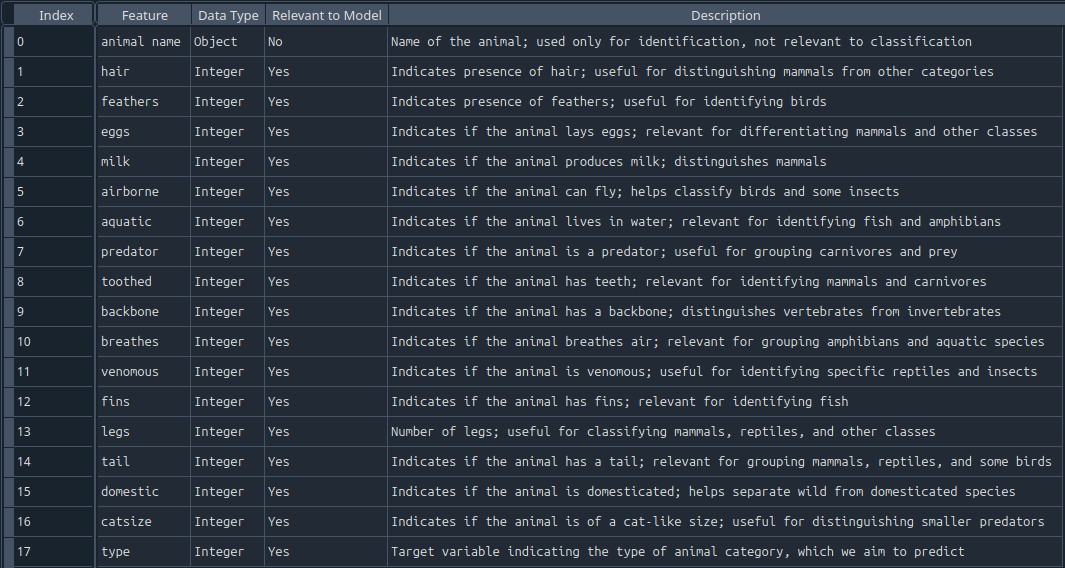

In [16]:
import pandas as pd
data=pd.read_csv("Datasets/Zoo.csv")

### EDA

In [17]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [18]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [19]:
data.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


<Axes: >

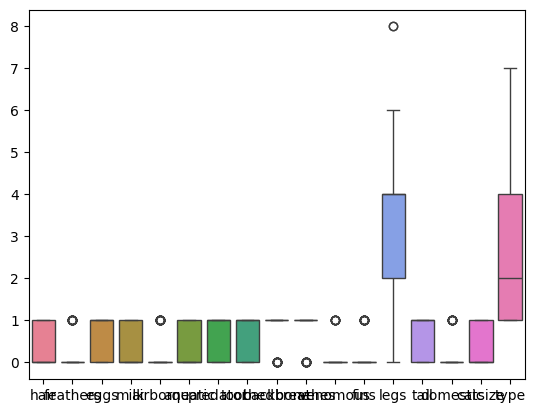

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data)

In [21]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [22]:
features=data.drop(['animal name','type'],axis=1)
target=data['type']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)
data_scaled=pd.DataFrame(features_scaled,columns=features.columns)
data_scaled["type"]=target
data_scaled["animal name"]=data["animal name"]

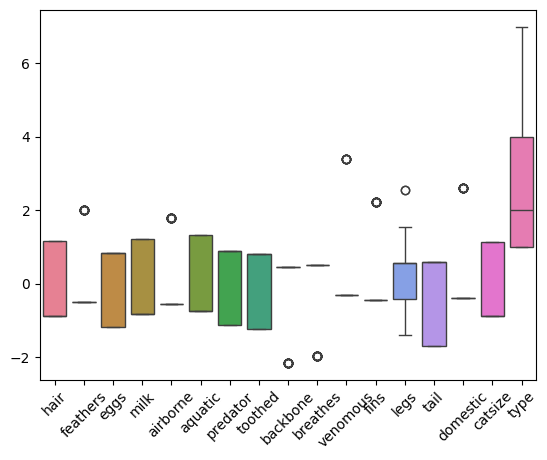

In [26]:
sns.boxplot(data=data_scaled)
plt.xticks(rotation=45)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [31]:
#try and select correct value for k
acc=[]
#running KNN algorithm for k=3 to k=50 in steps of 2
for i in range(3,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    train_acc=np.mean(knn.predict(X_train)==y_train)
    test_acc=np.mean(y_pred==y_test)
    acc.append([train_acc,test_acc])

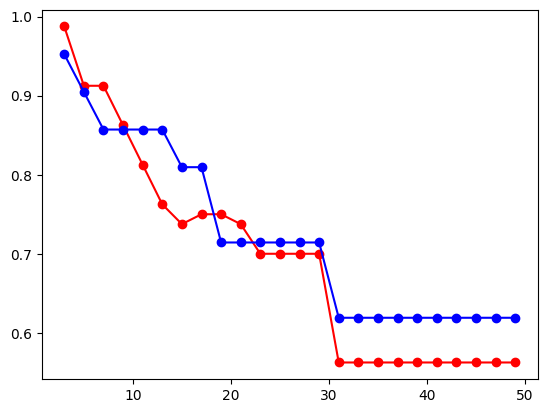

In [32]:
#plot the graph for tain_acc and test_acc
import matplotlib.pyplot as plt
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'ro-',label="Training Accuracy")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'bo-',label="Testing Accuracy")

In [37]:
#accuracy is high for k=5,9

In [39]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")
pd.crosstab(y_test,y_pred)

Accuracy: 0.9047619047619048


col_0,1,2,4,6,7
type,,,,,
1,11,0,1,0,0
2,0,2,0,0,0
3,0,0,1,0,0
4,0,0,2,0,0
6,0,0,0,3,0
7,0,0,0,0,1


In [40]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")
pd.crosstab(y_test,y_pred)

Accuracy: 0.8571428571428571


col_0,1,2,4,6
type,,,,
1,11,0,1,0
2,0,2,0,0
3,0,0,1,0
4,0,0,2,0
6,0,0,0,3
7,0,0,1,0
